In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading in beer_reviews_data and storing it under variable df
df = pd.read_csv('data/beer_reviews_data.csv')

# displaying a random sample of the dataset utilizing the .sample() function
df.sample(n = 10, random_state = 42)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
116087,5.8,234,76,Hacker-Pschorr Oktoberfest-M�rzen,M�rzen / Oktoberfest,4.0,3.5,4.0,4.5,divineaudio,4.5,pint glass. a - pours a clear amber liquid wit...,1317698982
218685,8.7,1446,158,Hibernation Ale,Old Ale,4.5,4.5,4.0,3.5,Cylinsier,3.0,From a 12 oz. Pours a maple syrup brown that g...,1262818901
63854,11.0,74491,16866,4 Calling Birds,Belgian Strong Dark Ale,4.0,3.0,3.0,3.5,womencantsail,3.0,On-tap at the Bruery Almost black with a dense...,1321823635
234370,5.0,43341,1628,Southampton Altbier,Altbier,2.5,4.0,4.0,3.5,DerekP,3.5,"According to the label, a ""Dusseldorf-Style Br...",1280711924
501494,9.0,40187,132,XS Imperial Red,American Amber / Red Ale,4.0,4.0,3.0,3.0,Gueuzedude,3.5,"Sampled on Tap at 1702, Tucson AZ; August 2008...",1219009004
246729,9.0,2512,215,Chimay Grande R�serve (Blue),Belgian Strong Dark Ale,3.5,5.0,4.5,4.0,mentor,4.0,Three finger dead tan head over a cloudy dark ...,1195591313
489422,5.3,353,132,Mocha Porter,American Porter,4.5,4.0,4.0,4.0,Stubbie1,4.0,"Appearance: Poured black, finished with a nice...",1041482821
243405,11.0,7975,48,Bi�re Du Boucanier Golden,Belgian Strong Pale Ale,3.5,4.5,3.0,3.0,Infamous7100,3.5,"Consumed this from a snifter, as you should wi...",1239405638
4124,8.4,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,3.5,3.0,3.5,Huhzubendah,3.5,Bottle shared by Chaney. Thanks Brandon! A: Th...,1286322675
479954,5.9,17300,9529,Pale Ale,American Pale Ale (APA),4.5,4.0,3.5,4.0,belgaridub,4.5,This came to the table a dark red-brown color....,1147897647


In [2]:
# understanding the data landscape of the dataset (dtype, non-null values and memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [3]:
# looking at descriptive statistics for all numericl columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
beer_ABV,508590.0,7.017442e+00,2.204460e+00,1.000000e-02,5.300000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerId,528870.0,2.209847e+04,2.215828e+04,3.000000e+00,1.745000e+03,1.436800e+04,4.052800e+04,7.731000e+04
beer_brewerId,528870.0,2.598423e+03,5.281805e+03,1.000000e+00,1.320000e+02,3.940000e+02,1.475000e+03,2.798000e+04
review_appearance,528870.0,3.864522e+00,6.040104e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palette,528870.0,3.758926e+00,6.853349e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_overall,528870.0,3.833197e+00,7.099618e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_taste,528870.0,3.765993e+00,6.690176e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_aroma,528870.0,3.817350e+00,7.189030e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_time,528870.0,1.224885e+09,7.605600e+07,8.843904e+08,1.174613e+09,1.240366e+09,1.288560e+09,1.326277e+09


In [4]:
# lastly understanding the dimensionality of the dataset
df.shape

(528870, 13)

### Dimensionality Results

+ This dataset contains 528,870 beer reviews
+ it has 13 columns 

### Another question

+ How many unique users make up the 528,870 reviews?

### Question 1: Which breweries produce the strongest beer?

#### Approach

+ In order to measure the strongest beers, we need to calculate the average ABV (Alcohol by Volume)
+ Therefore, group by the brewer ID, calculate the mean beer ABV and sort it in descending order
+ Using the .rank() function, then we can filter out for the topm 3 strongest Breweries

In [5]:
# grouping the dataset by brewer_abv and calculating the average alcohol by volume
df_abv = df.groupby('beer_brewerId')['beer_ABV'].mean().reset_index().sort_values(by = 'beer_ABV', ascending = False)

# rounding the average to the second decimal point and filling any null values with 0 for cleaner data
df_abv['beer_ABV'] = round(df_abv['beer_ABV'], 2).fillna(0)

# renaming the column for better readability
df_abv = df_abv.rename({"beer_ABV" : "avg_ABV"}, axis = 1)

# using the rank function to determine the top 3 breweries with the strongest beer
df_abv['rank'] = df_abv['avg_ABV'].rank(method = 'dense', ascending = False)

# displaying the dataset and filtering out for the top 3
df_abv[df_abv['rank'] <= 3]

,beer_brewerId,avg_ABV,rank
784,6513,19.23,1.0
175,736,13.75,2.0
1644,24215,12.47,3.0


### Telling a Story with the data

+ Let's look at the distribution of Alcohol by Volume using visuals
+ Beer_brewerId '6513' has a much higher average than the second and third highest averages
+ What is the median? Since the distribution seems to fairly spread out, median might be more effective than average
+ How many breweries are below the median?
+ On the cell below, let's implement a boxplot 

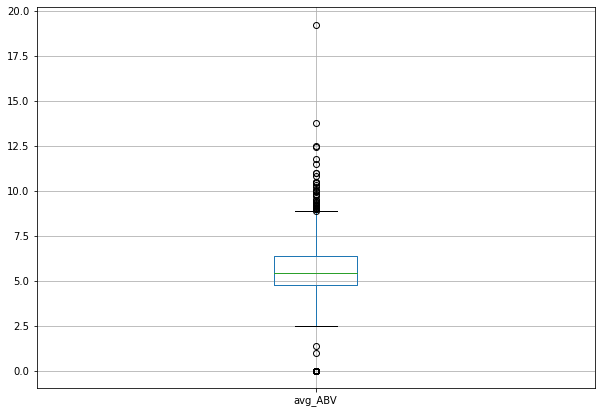

In [6]:
# creating the boxplot utilizing the average ABV by brewery
df_abv_box = df_abv.boxplot(column = 'avg_ABV', figsize = (10, 7))

### Boxplot Takeaways

+ Brewery ID '6513' is on a league of its own with an average of 19.2%
+ The median Alcohol by Volume is around 5.5 to 6%
+ There is a small amount of breweries that have a low Alcohol by Volume average, and some that are 0 because the average was null


### Question 2: Which year did beers enjoy the highest ratings?

#### Approach

+ Utilize the .to_datetime() function to extract the year from the ['review_time'] column
+ The timestamp is in [UNIX format](https://kb.narrative.io/what-is-unix-time.html) - Which is a time system for representing a point in time
+ It is the number of seconds that have elapsed since January 1st,1970 00:00:00 UTC
+ This means that when we convert the data using the to_datetime() function, the unit must be seconds instead of nanoseconds
+ Once we have the year, the data can be aggregated by year and calculate the average for highest ratings

In [7]:
# adding a new column to the dataframe with the year the review was placed
df['review_year'] = pd.to_datetime(df['review_time'], unit = "s").dt.year

In [8]:
# getting a better understanding of the distribution of reviews by year
review_counts = df.groupby('review_year')['review_time'].count().reset_index().rename({"review_time" : "review_counts"}, axis = 1)

In [9]:
# aggregating ratings grouped by year and the average review rating
df_review_year = df.groupby('review_year')['review_overall'].mean().reset_index().rename({"review_overall" : "avg_review_rating"}, axis = 1)

# rounding the review rating to the second nearest decimal
df_review_year['avg_review_rating'] = round(df_review_year['avg_review_rating'], 2)

# displaying the graph
df_review_year

,review_year,avg_review_rating
0,1998,3.89
1,1999,4.00
2,2000,4.18
3,2001,3.93
4,2002,3.80
5,2003,3.75
6,2004,3.79
7,2005,3.83
8,2006,3.80
9,2007,3.81


In [10]:
# merging the counts and the average for better visualization
df_review_year = pd.merge(df_review_year, review_counts, how = 'left', on = 'review_year')

# displaying the table after the join, now has the total reviews and the average
df_review_year

,review_year,avg_review_rating,review_counts
0,1998,3.89,23
1,1999,4.00,25
2,2000,4.18,33
3,2001,3.93,602
4,2002,3.80,7581
5,2003,3.75,18187
6,2004,3.79,22905
7,2005,3.83,29433
8,2006,3.80,43083
9,2007,3.81,46514


### Key takeaways from the data above

+ Despite having the highest average, year 2000 only received 33 reviews in total
+ To add additional context, 2011 received over 100,000 reviews alone
+ 1998 and 1999 also had very low review numbers, but at the years progress, the counts increase drastically
+ Years 1998 to 2001 average the highest ratings, however, based on the distribution of reviews it could be labelled at not enough data to draw conclusions

### Next Steps

+ Create a visualization that demonstrates average rating per year, while also including the total amount of reviews

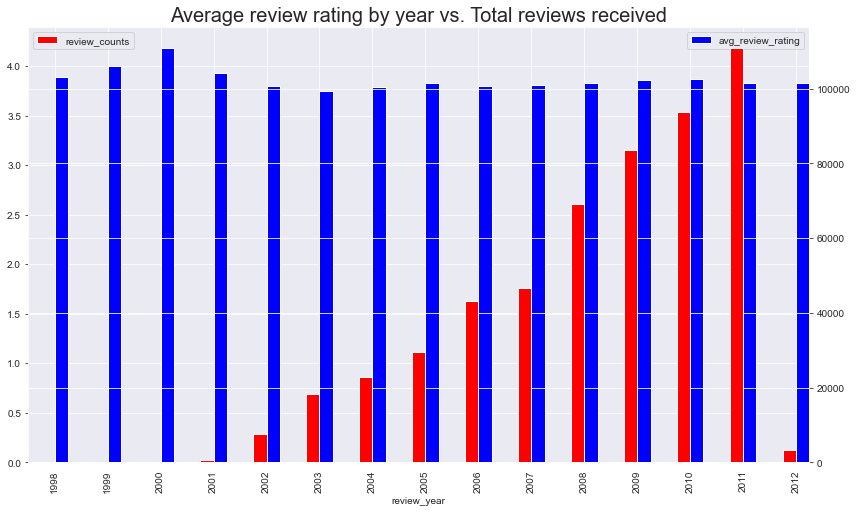

In [26]:
# setting plot style to dark grid
sns.set_style('darkgrid')

# defining font sizes for the plot elements
fontsize = 20
axfont = 12

# creating a new figure with a size of 14 x 8 
fig, ax = plt.subplots(figsize = (14, 8))

# setting up second y axis to plot review counts
ax2 = ax.twinx()

# plotting the first axis, which is the average review ratings and setting the bar colour to blue
df_review_year.plot(x = 'review_year', y = 'avg_review_rating', kind = 'bar', color = 'blue', ax = ax, position = 0, width = 0.25)

# plotting the secondary axis, which is the review counts and setting the bar colour to red
df_review_year.plot(x = 'review_year', y = 'review_counts', kind = 'bar', color = 'red', ax = ax2, position = 1, width = 0.25)

# adding a title to the barchart, and increasing the title to font 20
plt.title('Average review rating by year vs. Total reviews received', fontdict = {'fontsize' : fontsize})
                    
# displaying the visual    
plt.show();